# WeChat Friends Easy Report 

## Introduction
In this project, we would like to introduce a powerful and light-weight third library that was called 'wxpy' to help you know more on your wechat friends. Click [here](https://github.com/youfou/wxpy) if you want to know more about it.

During the process, you will get familiar with those fundmental steps on data analysis, like data extraction(collection), data wrangling, exploratory analysis and visualization.

This is an original project implemented by myself.

##  Data Collection

Import needed packages. Then, store friend_data into dataframe

In [1]:
# import packages
import re
from wxpy import * # installed before import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# for visualization
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

%matplotlib inline

In [2]:
# initialize your wechat bot to pull relevant information
bot = Bot()
# persistant and stable property toward user id (no duplicated)
bot.enable_puid()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 美滋滋


Concering toward the **user privacy of data** , I desensitized and extracted the following features: puid, gender(sex), signature, province and city, to help generate friends report

In [3]:
# initialize a list of dictionaries to store friend data
friend_data = []
for friend in bot.friends():
    data = {
        'id' : friend.puid,
        'gender' : friend.sex, # male = 1, female = 2
        'signature' : friend.signature,
        'first_region' : friend.province,
        'second_region' : friend.city
    }
    
    friend_data.append(data)

In [4]:
# transform list of dictionaries into pandas dataframe for analysis
df = pd.DataFrame(friend_data)
df.columns

Index(['first_region', 'gender', 'id', 'second_region', 'signature'], dtype='object')

In [5]:
# re-order the columns
df = df[['id','gender','first_region','second_region','signature']]
df.head()

,id,gender,first_region,second_region,signature
0,cb4c2b89,1,,,鸽子 真香 复读机
1,cabdc692,2,香港,,从今天起，和CHY、XY上一艘船
2,3e7345d9,2,云南,昆明,因为有海猫在码头悲鸣
3,74053209,1,Sha Tin,,
4,e6a0ffb5,2,Sha Tin,,Always on my way


## Data Wrangling

See what issues we have found above:
- First row that contains my data should be excluded because of 'friend_data'
- In signature column, escape char and emoji char can't stored in correct format
- Sematically, some errors found in first and second region when it comes to Hong Kong, eg, Sha Tin shouldn't belong to first region at row_index: 2
- Meanwhile, these relevant rows should deliver the same meaning as the Chinese presents. 

Let's try to fix them.

In [6]:
# before everything, make a copy!
df_clean = df.copy()

In [7]:
# issue 1 : drop it
df_clean.drop(index=0, inplace= True)

In [8]:
# issue 2: replace escape char with '', remove abnormal emoji char

def standarlize(string):
    tmp = string.strip().replace('\n','')
    return re.sub(r'<span.*./span>','',tmp)

df_clean.signature = df_clean.signature.apply(standarlize)

for issue 3:
- pre-define a dictionary for districts in Hong Kong, detailed names of all districts in Hong Kong, please click [reference](https://en.wikipedia.org/wiki/Districts_of_Hong_Kong)

In [9]:
hk_districts ={
'Central and Western':'中西区', 'Eastern':"东区", 'Southern':"南区", 
'Wan Chai':"湾仔区", 'Sham Shui Po':'深水埗区', 'Kowloon City':"九龙城区",
'Kwun Tong': "观塘区", 'Wong Tai Sin':"黄大仙区",'Yau Tsim Mong':"油尖旺区",
'Islands':"离岛区",'Kwai Tsing':"葵青区",'North':"北区",'Sai Kung':"西贡区",
'Sha Tin':"沙田区",'Tai Po':"大埔区",'Tsuen Wan':"荃湾区",'Tuen Mun':"屯门区",
'Yuen Long':"元朗区"
}

In [10]:
for index in df_clean.index:
    region = df_clean.loc[index].first_region
    if region in hk_districts.keys():
        df_clean.loc[index, 'first_region'] = '香港'
        df_clean.loc[index, 'second_region'] = hk_districts[region]

In [11]:
#  make sure that all issues has been solved !
df_clean

,id,gender,first_region,second_region,signature
1,cabdc692,2,香港,,从今天起，和CHY、XY上一艘船
2,3e7345d9,2,云南,昆明,因为有海猫在码头悲鸣
3,74053209,1,香港,沙田区,
4,e6a0ffb5,2,香港,沙田区,Always on my way
5,f2da0616,2,香港,,
6,87f5a1ca,0,,,
7,1f09b3b6,1,云南,昆明,protect
8,adf26445,1,云南,昆明,
9,94b1a3c2,1,四川,成都,自己的路只在于两条。 一是坚持 二是选择！
10,c85e57f7,2,北京,海淀,


#### Explaination about some empty value about first\second region and signature
For WeChat freshman users, they sometimes may forget to add region & signature information in their accounts, we didn't gather these data consequently

### Optional : Save and export DataFrame to spreadsheet
    writer = pd.ExcelWriter('output.xlsx')
    df.to_excel(writer,'Sheet1')
    writer.save()

## Exploratory Analysis
I will focus on the gender, fisrt&second region distributions on friends data and visualize them.
- gender : unknown = 0, male = 1, female = 2

In [12]:
df_clean.gender.value_counts(normalize=True) # set parameter 'Normalize' to see percentile ranks

1    0.482713
2    0.461436
0    0.055851
Name: gender, dtype: float64

Remark: some users may not be familiar with using WeChat, their gender has been set '0' by defualt

In [13]:
df_clean.gender.value_counts()

1    363
2    347
0     42
Name: gender, dtype: int64

For value first and second regions, empty is set as '', while not NaN. Let's replace them first

In [14]:
df_clean.first_region.replace('',np.NaN, inplace=True)
df_clean.second_region.replace('',np.NaN, inplace=True)

- first and second region TOP 10

In [15]:
df_clean.first_region.value_counts().head(10)

香港    211
云南    131
北京     42
广东     23
上海     21
浙江     13
江苏     12
四川      9
福建      6
山东      5
Name: first_region, dtype: int64

In [16]:
df_clean.second_region.value_counts().head(10)

沙田区     138
昆明      119
海淀       22
深圳       14
杭州        8
成都        8
中西区       7
朝阳        7
九龙城区      5
广州        5
Name: second_region, dtype: int64

## Data Visualization

For visuilazation, suggest to use [wordcloud](https://github.com/fuqiuai/wordCloud), a powerful word visualizer 

In [17]:
# prepare word text
region_1 = df_clean.first_region.dropna().tolist()
region_1 = " ".join(region_1)

region_2 = df_clean.second_region.dropna().tolist()
region_2= " ".join(region_2)

# prepare wechat logo as mask
mask = np.array(Image.open("wechat.png"))

# initialize wordcloud object
wc = WordCloud(background_color="black", mask = mask, scale=50,
               random_state= 42, font_path = "/Library/Fonts/Songti.ttc")

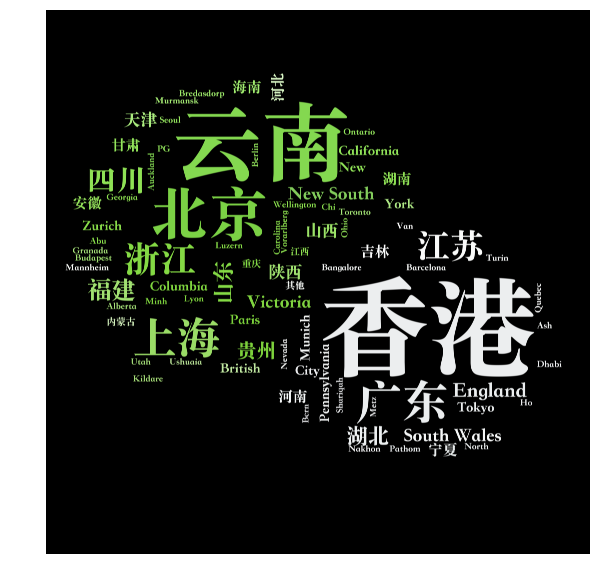

In [18]:
wc.generate(region_1)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

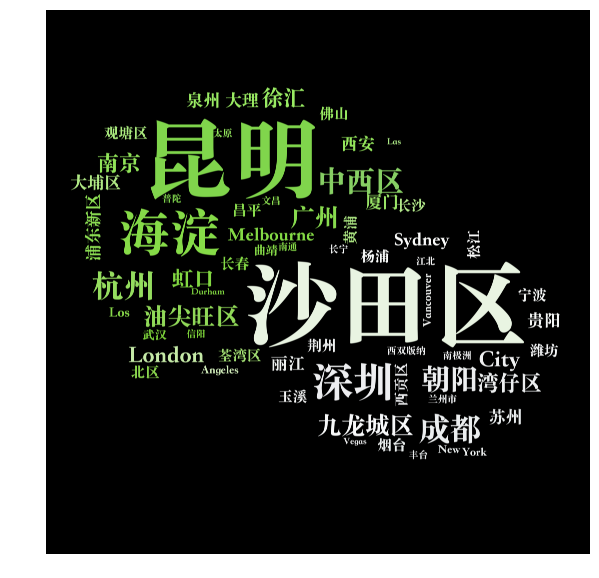

In [19]:
wc.generate(region_2)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

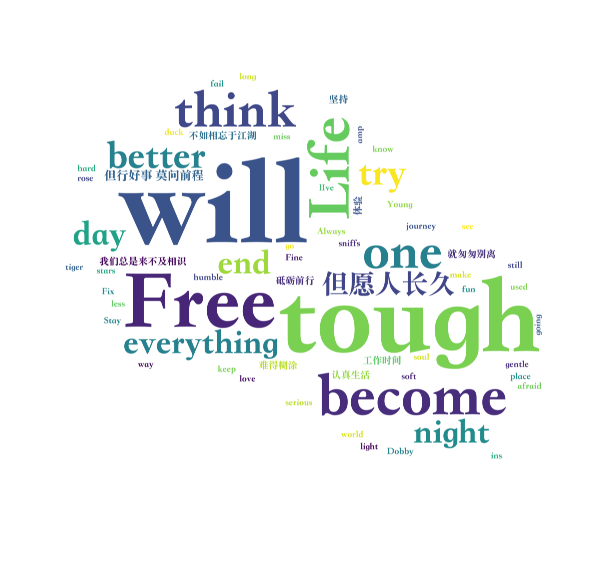

LOG OUT!


In [20]:
# friends signatures word visualize
wc1 = WordCloud(background_color="white", mask = mask, scale=50,
                font_path = "/Library/Fonts/SongTi.ttc")

sig = df_clean.signature.dropna().tolist()
sig = " ".join(sig)

wc1.generate(sig)
plt.figure(figsize=[10,10])
plt.imshow(wc1,interpolation='bilinear')
plt.axis("off")
plt.show()

## Thanks for reading
This is the end of this porject, please feel free to leave your comments and ideas, both in English and Chinese, are welcomed. 